In [11]:
#有监督学习
from sklearn import datasets
iris  = datasets.load_iris()
iris.data #包含数据

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris.target #花卉种类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

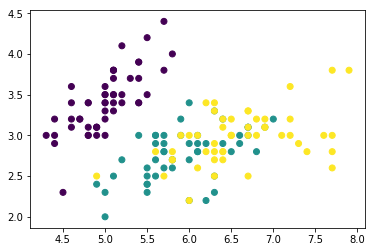

(0.0, 1.0)

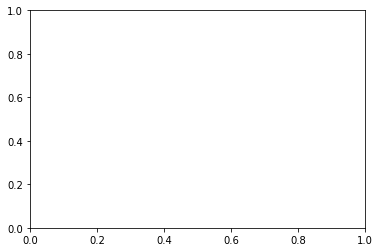

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
x = iris.data[:,0]
y = iris.data[:,1]
species = iris.target

#plt.figure(figsize=(800,600))
plt.scatter(x,y,c=species)
plt.show()
plt.ylim()

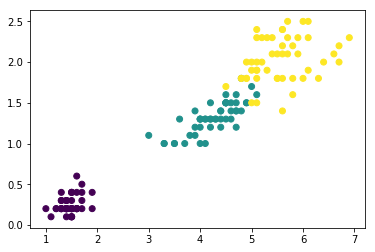

In [14]:
x = iris.data[:,2]
y = iris.data[:,3]
plt.scatter(x,y,c=species)

[]

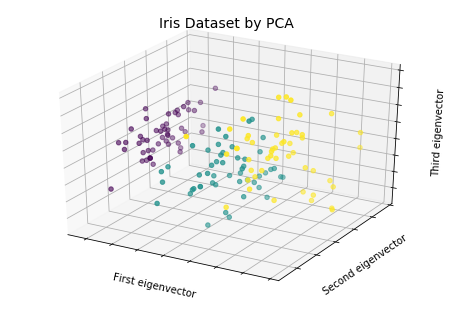

In [21]:
#主成分分解
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

x = iris.data[:,0]
y = iris.data[:,1]
species = iris.target

x_reduced = PCA(n_components=3).fit_transform(iris.data) #n_components 是保留的特征个数

#ScatterPlot 3D
fig = plt.figure()
ax = Axes3D(fig)

ax.set_title('Iris Dataset by PCA',size=14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2],c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())

In [30]:
#K-近邻分类器，分为测试集和训练集
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()

x = iris.data
y = iris.target

i = np.random.permutation(len(iris.data)) #打乱数据集的所有元素

x_train = x[i[:-10]]
y_train = y[i[:-10]]

x_test = x[i[-10:]]
y_test = y[i[-10:]]

#k近邻算法
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

knn.predict(x_test)

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1])

In [32]:
y_test

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1])

(1.5, 4.900000000000003)

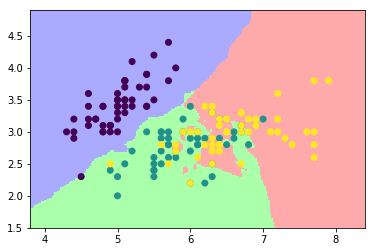

In [62]:
#画出萼片决策边界
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

x = iris.data[:,:2]
y = iris.target

x_min,x_max = x[:,0].min() - .5, x[:,0].max()+.5
y_min,y_max = x[:,1].min() - .5, x[:,1].max()+.5

cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA']) #各个区域颜色
h = .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) #一个坐标向量中返回一个坐标矩阵

#决策边界
knn = KNeighborsClassifier()
knn.fit(x,y)

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#画出训练的点
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

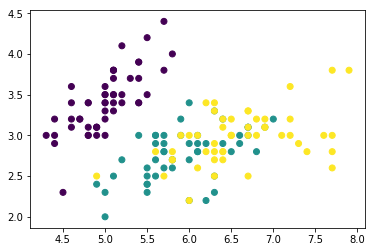

In [51]:
plt.scatter(x[:,0],x[:,1],c=y)

(-0.4, 2.980000000000003)

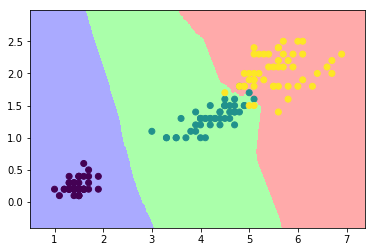

In [63]:
#画出花瓣决策边界
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

x = iris.data[:,2:4]
y = iris.target

x_min,x_max = x[:,0].min() - .5, x[:,0].max()+.5
y_min,y_max = x[:,1].min() - .5, x[:,1].max()+.5

cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA']) #各个区域颜色
h = .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) #一个坐标向量中返回一个坐标矩阵

#决策边界
knn = KNeighborsClassifier()
knn.fit(x,y)

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#画出训练的点
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [90]:
#Diabetes 数据集
from sklearn import datasets

from sklearn import linear_model

diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

linreg = linear_model.LinearRegression()

linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
linreg.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [81]:
linreg.predict(x_test)

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [82]:
y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [83]:
linreg.score(x_test,y_test) #越接近于1，预测效果越准确

0.5850753022690574

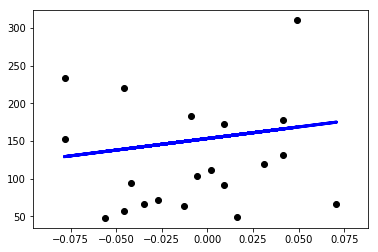

In [110]:
#Diabetes 数据集
from sklearn import datasets

from sklearn import linear_model

diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

linreg1 = linear_model.LinearRegression()

x0_test = x_test[:,0][:,np.newaxis] #把取到的列生成行
x0_train = x_train[:,0][:,np.newaxis]

linreg1.fit(x0_train,y_train)
y = linreg1.predict(x0_test)

plt.scatter(x0_test,y_test,color = 'k') #实际结果
plt.plot(x0_test,y,color = 'b',linewidth = 3) #预测结果
#从下图可以看书，线型模型不符合预测

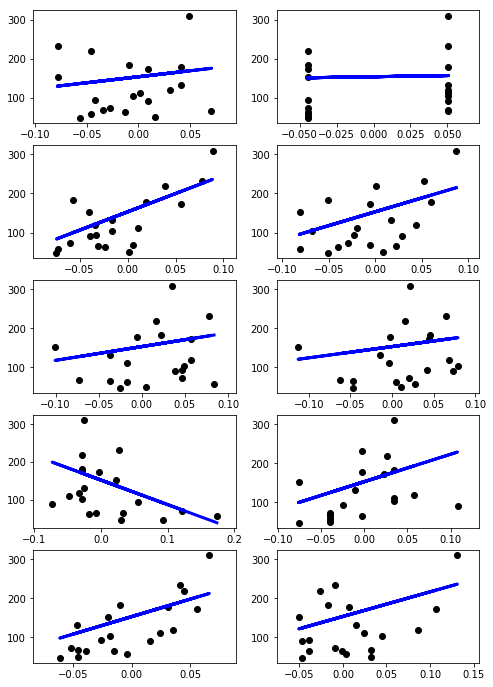

In [112]:
#一共有10个因素影响该病，对每一个因素创建模型，生成图表
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

linreg = linear_model.LinearRegression()
plt.figure(figsize=(8,12))
for f in range(0,10):
    x0_test = x_test[:,f][:,np.newaxis] #把取到的列生成行
    x0_train = x_train[:,f][:,np.newaxis]

    linreg.fit(x0_train,y_train)
    y = linreg.predict(x0_test)
    
    plt.subplot(5,2,f+1)
    plt.scatter(x0_test,y_test,color = 'k') #实际结果
    plt.plot(x0_test,y,color = 'b',linewidth = 3) #预测结果

#     xi_test = x_test[:,f][:,np.newaxis]
#     xi_train = x_train[:,f][:,np.newaxis]
    
#     linreg.fit(xi_train,y_train)
#     y = linreg.predict(xi_test)
#     plt.subplot(5,2,f+1)
    
#     #plt.title('')
#     plt.scatter(xi_test,y_test,color = 'k')
#     plt.plot(xi_test,y,color='b',linewidth = 3)

In [1]:
#支持向量机（SVM分类器support vector machines）
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5

svc = svm.SVC(kernel= 'linear').fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'],levels=[0])
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)